<a href="https://colab.research.google.com/github/shubham5027/Online_Payment_Fraud_Detection/blob/main/P3_OPFD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
df=pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


Dataset Details :

step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig: customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrig: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recipient before the transaction

newbalanceDest: the new balance of recipient after the transaction

isFraud: fraud transaction

In [7]:
df.shape

(42271, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42271 entries, 0 to 42270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42271 non-null  int64  
 1   type            42271 non-null  object 
 2   amount          42271 non-null  float64
 3   nameOrig        42271 non-null  object 
 4   oldbalanceOrg   42271 non-null  float64
 5   newbalanceOrig  42271 non-null  float64
 6   nameDest        42271 non-null  object 
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
 10  isFlaggedFraud  42270 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.5+ MB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42271 entries, 0 to 42270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42271 non-null  int64  
 1   type            42271 non-null  object 
 2   amount          42271 non-null  float64
 3   nameOrig        42271 non-null  object 
 4   oldbalanceOrg   42271 non-null  float64
 5   newbalanceOrig  42271 non-null  float64
 6   nameDest        42271 non-null  object 
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
 10  isFlaggedFraud  42270 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.5+ MB


In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:

df['amount']=df['amount'].astype('int32')
df['oldbalanceOrg']=df['oldbalanceOrg'].astype('int32')
df['newbalanceOrig']=df['newbalanceOrig'].astype('int32')
df['newbalanceDest']=df['newbalanceDest'].astype('int32')
df['oldbalanceDest']=df['oldbalanceDest'].astype('int32')
df['isFraud']=df['isFraud'].astype('int32')
df['isFlaggedFraud']=df['isFlaggedFraud'].astype('int32')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42270 entries, 0 to 42269
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   step            42270 non-null  int64 
 1   type            42270 non-null  object
 2   amount          42270 non-null  int32 
 3   nameOrig        42270 non-null  object
 4   oldbalanceOrg   42270 non-null  int32 
 5   newbalanceOrig  42270 non-null  int32 
 6   nameDest        42270 non-null  object
 7   oldbalanceDest  42270 non-null  int32 
 8   newbalanceDest  42270 non-null  int32 
 9   isFraud         42270 non-null  int32 
 10  isFlaggedFraud  42270 non-null  int32 
dtypes: int32(7), int64(1), object(3)
memory usage: 2.7+ MB


In [16]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839,C1231006815,170136,160296,M1979787155,0,0,0,0
1,1,PAYMENT,1864,C1666544295,21249,19384,M2044282225,0,0,0,0
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1,0
3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1,0
4,1,PAYMENT,11668,C2048537720,41554,29885,M1230701703,0,0,0,0


In [17]:
df['type'].value_counts()

PAYMENT     19382
CASH_OUT    10688
CASH_IN      7632
TRANSFER     3974
DEBIT         594
Name: type, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, 'PAYMENT'),
  Text(1, 0, 'TRANSFER'),
  Text(2, 0, 'CASH_OUT'),
  Text(3, 0, 'DEBIT'),
  Text(4, 0, 'CASH_IN')])

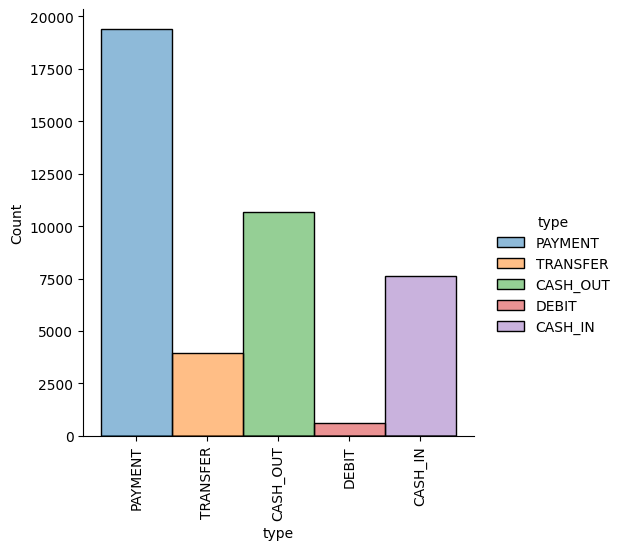

In [18]:
sns.displot(df,x=df['type'],hue=df['type'])
plt.xticks(rotation='vertical')

In [19]:
df.corr()['isFraud'].sort_values(ascending=False)

<ipython-input-19-a2163131b56e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['isFraud'].sort_values(ascending=False)


isFraud           1.000000
amount            0.058899
oldbalanceOrg    -0.004536
newbalanceDest   -0.008193
oldbalanceDest   -0.012463
newbalanceOrig   -0.015376
step             -0.050289
isFlaggedFraud         NaN
Name: isFraud, dtype: float64

In [20]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839,C1231006815,170136,160296,M1979787155,0,0,0,0
1,1,PAYMENT,1864,C1666544295,21249,19384,M2044282225,0,0,0,0
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1,0
3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1,0
4,1,PAYMENT,11668,C2048537720,41554,29885,M1230701703,0,0,0,0


([0, 1, 2, 3, 4],
 [Text(0, 0, 'PAYMENT'),
  Text(1, 0, 'TRANSFER'),
  Text(2, 0, 'CASH_OUT'),
  Text(3, 0, 'DEBIT'),
  Text(4, 0, 'CASH_IN')])

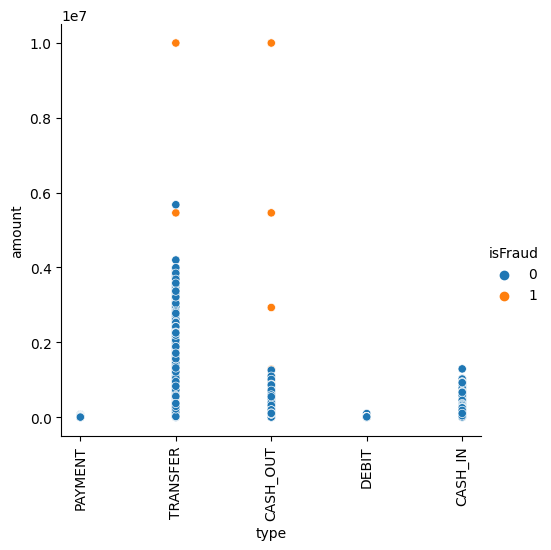

In [21]:
sns.relplot(df,x=df['type'],y=df['amount'],hue=df['isFraud'])
plt.xticks(rotation='vertical')

<ipython-input-22-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

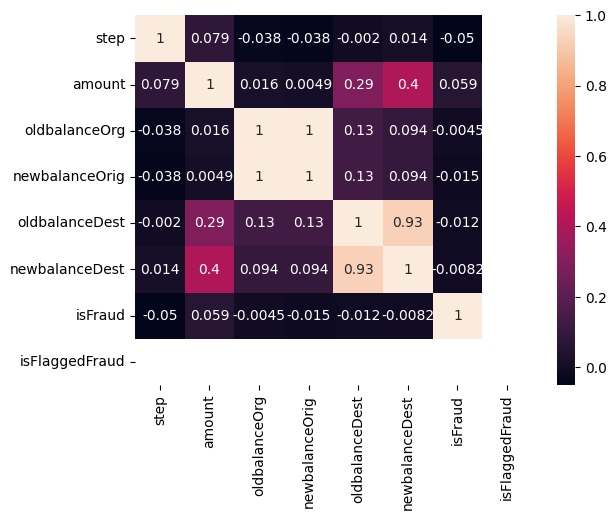

In [22]:
sns.heatmap(df.corr(),annot=True)

In [23]:
# sns.pairplot(df)

In [24]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# #

In [25]:
# import pandas as pd
# import pandas_profiling
# # from pandas_profiling import ProfileReport

In [26]:
# profile = ProfileReport(df, title="data set", html={'style' : {'full_width':True}})
# profile.to_file(output_file="name of html file.html")

In [27]:
df=df.drop(['step','nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [28]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['type']=lb.fit_transform(df['type'])

In [29]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3,9839,170136,160296,0,0,0
1,3,1864,21249,19384,0,0,0
2,4,181,181,0,0,0,1
3,1,181,181,0,21182,0,1
4,3,11668,41554,29885,0,0,0


In [30]:
X=df.drop(['isFraud'],axis=1)
y=df['isFraud']

Building a Model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


In [33]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()
rfc=RandomForestClassifier()
etc=ExtraTreeClassifier()
abc=AdaBoostClassifier()
knn=KNeighborsClassifier()
xbc=XGBClassifier()
gbc=GradientBoostingClassifier()



In [34]:
def  train_model(model,X_train,X_test,y_train,y_test):
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision


In [35]:
train_model(lr,X_train,X_test,y_train,y_test)

(0.9972793943695292, 0.5135135135135135)

In [36]:
#Running all algotms oncd
!pip install lazypredict


In [37]:
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor
LC=LazyClassifier()

In [ ]:
models,predictions=LC.fit(X_train,X_test,y_train,y_test)

 41%|████▏     | 12/29 [01:10<03:40, 12.99s/it]